In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [21]:
df = pd.read_excel("/Users/vasupratap/Documents/EDA Project/Superstore_USA.xlsx")

In [22]:
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [23]:
df.shape

(9426, 24)

In [24]:
# now we will first do data cleaning by checking if there is missing or null value,
# and remove them or fill those mean values by mean value, const values etc.

In [25]:
df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [29]:
df['Product Base Margin'].fillna(df['Product Base Margin']== df['Product Base Margin'].mean())

0       0.36
1       0.54
2       0.37
3       0.56
4       0.59
        ... 
9421     0.4
9422    0.54
9423    0.71
9424    0.65
9425    0.38
Name: Product Base Margin, Length: 9426, dtype: object

In [31]:
df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

# ORDER PRIORITY 

In [34]:
df['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [39]:
df['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [44]:
df['Order Priority']=df['Order Priority'].replace("Critical ","Critical")

In [45]:
df['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

In [ ]:
# above we corrected a spacing problem by replacing it with correct value, so now if we use value_counts() there will bw one critical only

In [46]:
df['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

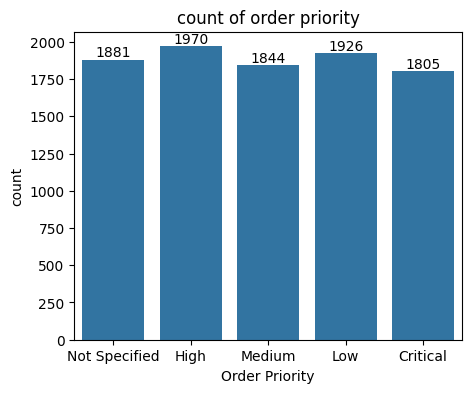

In [109]:
plt.figure(figsize=(5,4))
ax=sns.countplot(x='Order Priority', data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('count of order priority')
plt.show()

# SHIP MODE

In [50]:
df['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [76]:
x = df['Ship Mode'].value_counts().index
y = df['Ship Mode'].value_counts().values

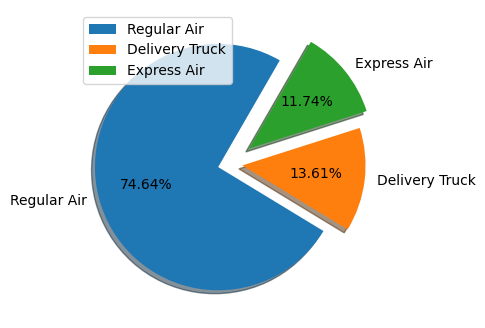

In [80]:
plt.figure(figsize=(5,4))
explodes=[0.1,0.1,0.2]
plt.pie(y, labels=x, startangle = 60, autopct = '%0.2f%%', explode = explodes, shadow=True)
plt.legend(loc=2)
plt.show()

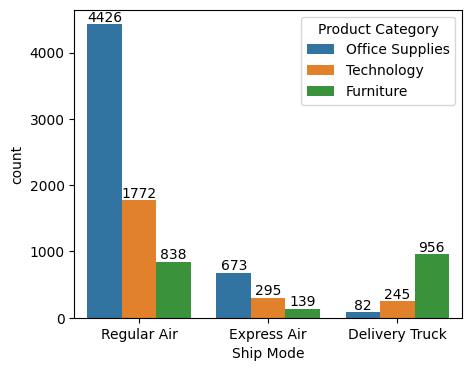

In [110]:
plt.figure(figsize=(5,4))
ax=sns.countplot(x='Ship Mode', data = df, hue = 'Product Category')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()
# this is bivariate data analysis. here we compared product category in a particular shipmode i.e two things

# CUSTOMER SEGMENT

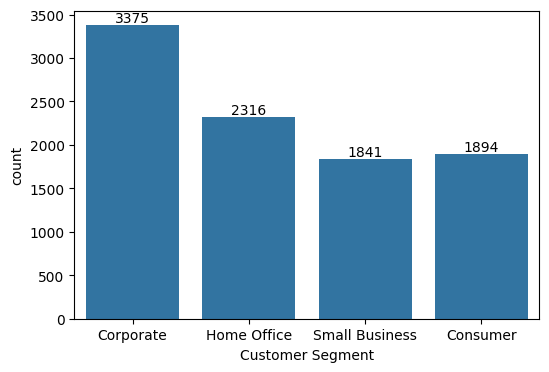

In [111]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Customer Segment', data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# PRODUCT CATEGORY

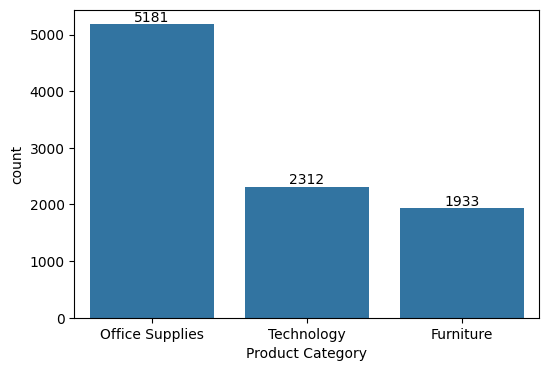

In [112]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Product Category', data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

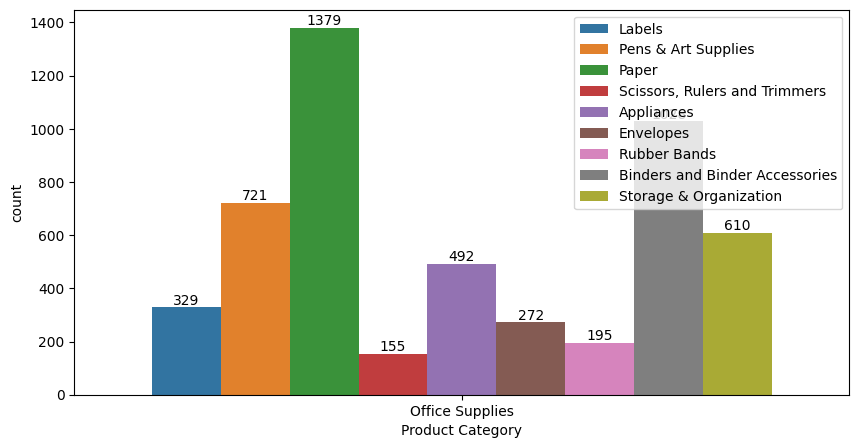

In [123]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Product Category', data = df[df["Product Category"] =="Office Supplies"], hue="Product Sub-Category")
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(loc=1)
plt.show()

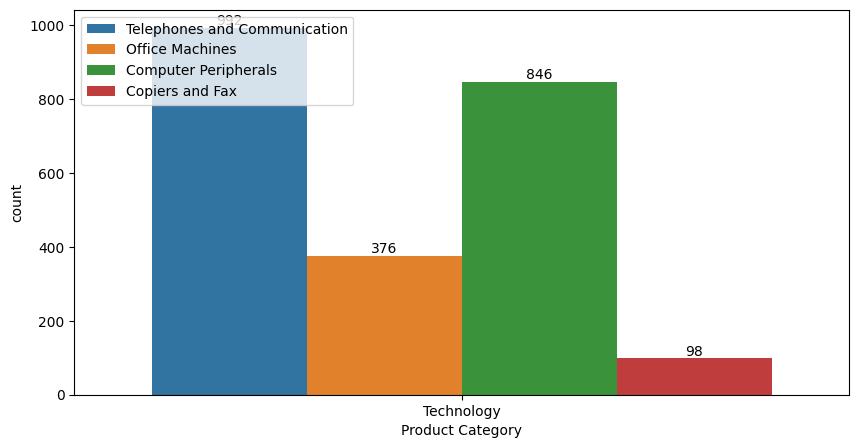

In [124]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Product Category', data = df[df["Product Category"] =="Technology"], hue="Product Sub-Category")
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(loc=2)
plt.show()

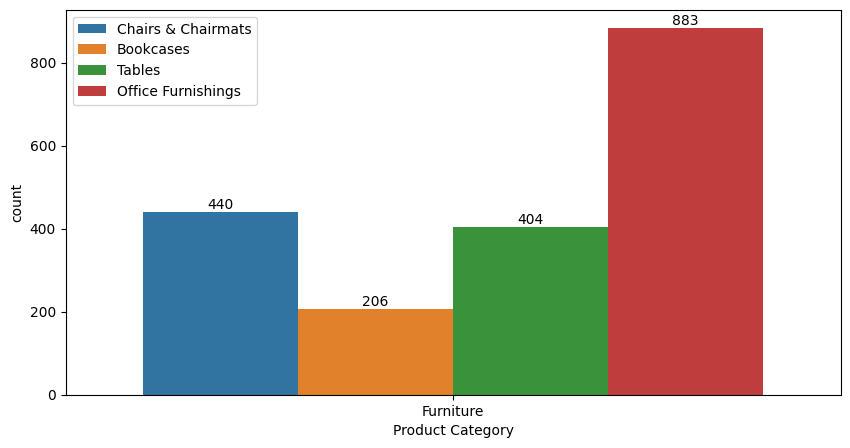

In [125]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Product Category', data = df[df["Product Category"] =="Furniture"], hue="Product Sub-Category")
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(loc=2)
plt.show()

In [ ]:
# above we are analyzig which product sub-category is selling more in a particular product category. this bivariate analysis

In [100]:
df["Order Year"] = df["Order Date"].dt.year

In [ ]:
# above we seperated year from dates and created a new columns which contain year in which product is sold.

In [101]:
df["Order Year"].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

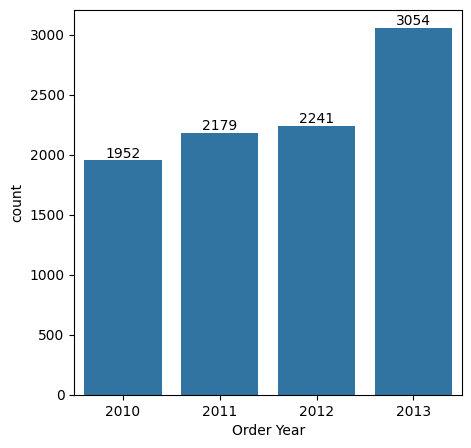

In [128]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='Order Year', data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [ ]:
# above we analyze in which year most sale were.

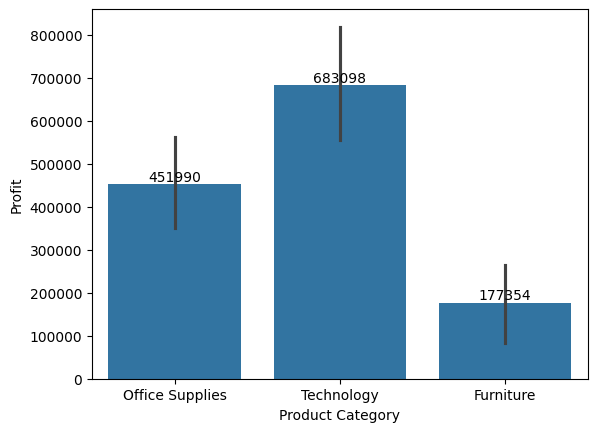

In [129]:
ax=sns.barplot(x = 'Product Category',y = 'Profit', data = df, estimator = 'sum')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [ ]:
# above we analyzed in which category we have most profits.

In [157]:
df['State or Province'].value_counts().nlargest(5)

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

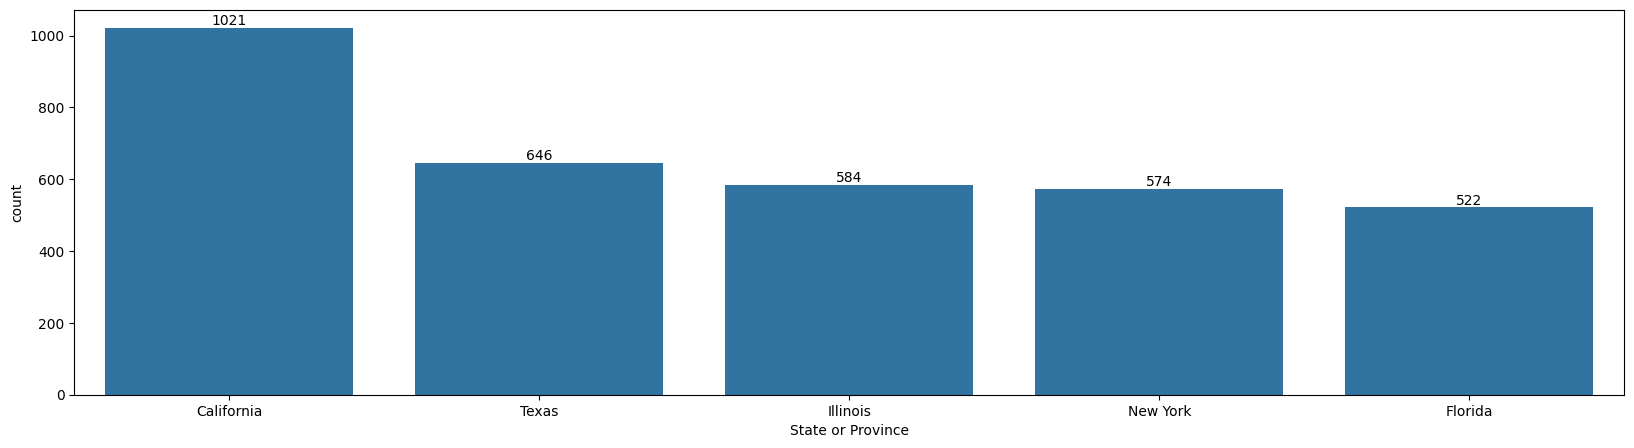

In [160]:
# Get the top 5 states by count
top_states = df['State or Province'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 states
filtered_df = df[df['State or Province'].isin(top_states)]

plt.figure(figsize=(20, 5))
ax = sns.countplot(x='State or Province', data=filtered_df, order=top_states)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [ ]:
# above we analyzed in which state how much we are selling.

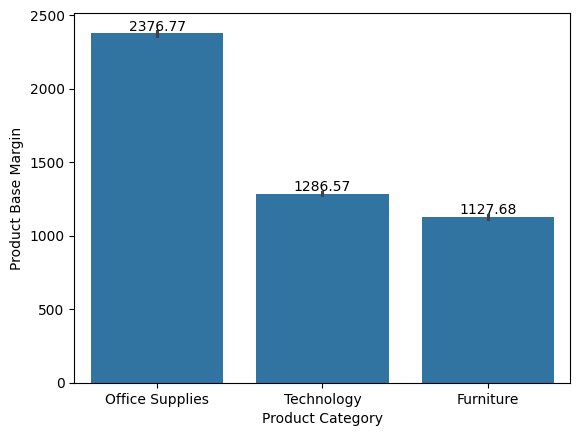

In [163]:
ax=sns.barplot(x = 'Product Category',y = 'Product Base Margin', data = df, estimator = 'sum')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()